In [1]:
import torch
import matplotlib.pyplot as plt
import utils
import tqdm
import dataloaders
import torchvision
from trainer import Trainer

### Model Definition

In [2]:
torch.random.manual_seed(0)

class FullyConnectedModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(num_input_nodes, num_classes),
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out

### Hyperparameters & Loss function

In [3]:
# Hyperparameters
batch_size = 64
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Model definition
model = FullyConnectedModel()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
image_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor()
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform=image_transform)

normalized_image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.25)
])
normalized_dataloader_train, normalized_dataloader_val = dataloaders.load_dataset(batch_size, image_transform=normalized_image_transform)

### Train model

In [4]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, val_loss_dict = trainer.train(num_epochs)

normalized_trainer = Trainer(
  model=model,
  dataloader_train=normalized_dataloader_train,
  dataloader_val=normalized_dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
normalized_train_loss_dict, normalized_val_loss_dict = normalized_trainer.train(num_epochs)


Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

IndexError: too many indices for tensor of dimension 0

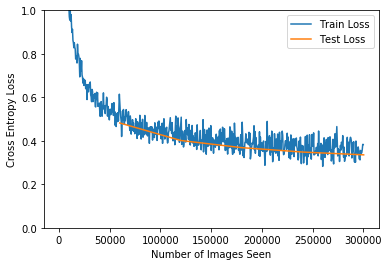

Final Test Cross Entropy Loss: 0.33551278769685206. Final Test accuracy: 0.9089


In [5]:

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Number of Images Seen")
plt.ylabel("Cross Entropy Loss")
plt.savefig("training_loss.png")

plt.show()
torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print(f"Final Test Cross Entropy Loss: {final_loss}. Final Test accuracy: {final_acc}")